In [79]:
import pandas as pd
import cv2
import numpy as np
import os
from PIL import Image
import seaborn as sns
import missingno as msno

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False

# data_loc = "D:/data/h-and-m-personalized-fashion-recommendations/"
data_loc = "G:/내 드라이브/프로젝트/Kaggle_H&M/data/h-and-m-personalized-fashion-recommendations/"

In [2]:
def row_show(x=None):
    pd.set_option("display.max_rows", x)
    
def col_show(x=None):
    pd.set_option("display.max_columns", x)

os.listdir(data_loc)

['images',
 'articles.csv',
 'customers.csv',
 'sample_submission.csv',
 'transactions_train.csv']

# 0.Data Load
---

In [3]:
# df_customers = pd.read_csv(data_loc+"customers.csv", encoding="utf-8")
df_articles = pd.read_csv(data_loc+"articles.csv", encoding="utf-8")
# df_submissions = pd.read_csv(data_loc+"sample_submission.csv", encoding="utf-8")
# df_transactions_train = pd.read_csv(data_loc+"transactions_train.csv", encoding="utf-8")

# 1.Data Look Up
---

## 1.1.Basic Information
---

In [4]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [5]:
col_show()
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
## look up columns in df_articles

for col in df_articles.columns:
    unq = df_articles[col].unique()
    print(f"{col}:\t{unq if len(unq) < 10 else '*** Lots Of Values *** :::' , len(unq)}")

article_id:	('*** Lots Of Values *** :::', 105542)
product_code:	('*** Lots Of Values *** :::', 47224)
prod_name:	('*** Lots Of Values *** :::', 45875)
product_type_no:	('*** Lots Of Values *** :::', 132)
product_type_name:	('*** Lots Of Values *** :::', 131)
product_group_name:	('*** Lots Of Values *** :::', 19)
graphical_appearance_no:	('*** Lots Of Values *** :::', 30)
graphical_appearance_name:	('*** Lots Of Values *** :::', 30)
colour_group_code:	('*** Lots Of Values *** :::', 50)
colour_group_name:	('*** Lots Of Values *** :::', 50)
perceived_colour_value_id:	(array([ 4,  3,  1,  2,  5,  7,  6, -1], dtype=int64), 8)
perceived_colour_value_name:	(array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object), 8)
perceived_colour_master_id:	('*** Lots Of Values *** :::', 20)
perceived_colour_master_name:	('*** Lots Of Values *** :::', 20)
department_no:	('*** Lots Of Values *** :::', 299)
department_name:	('*** Lots Of Value

## 1.2.Check with image files
---

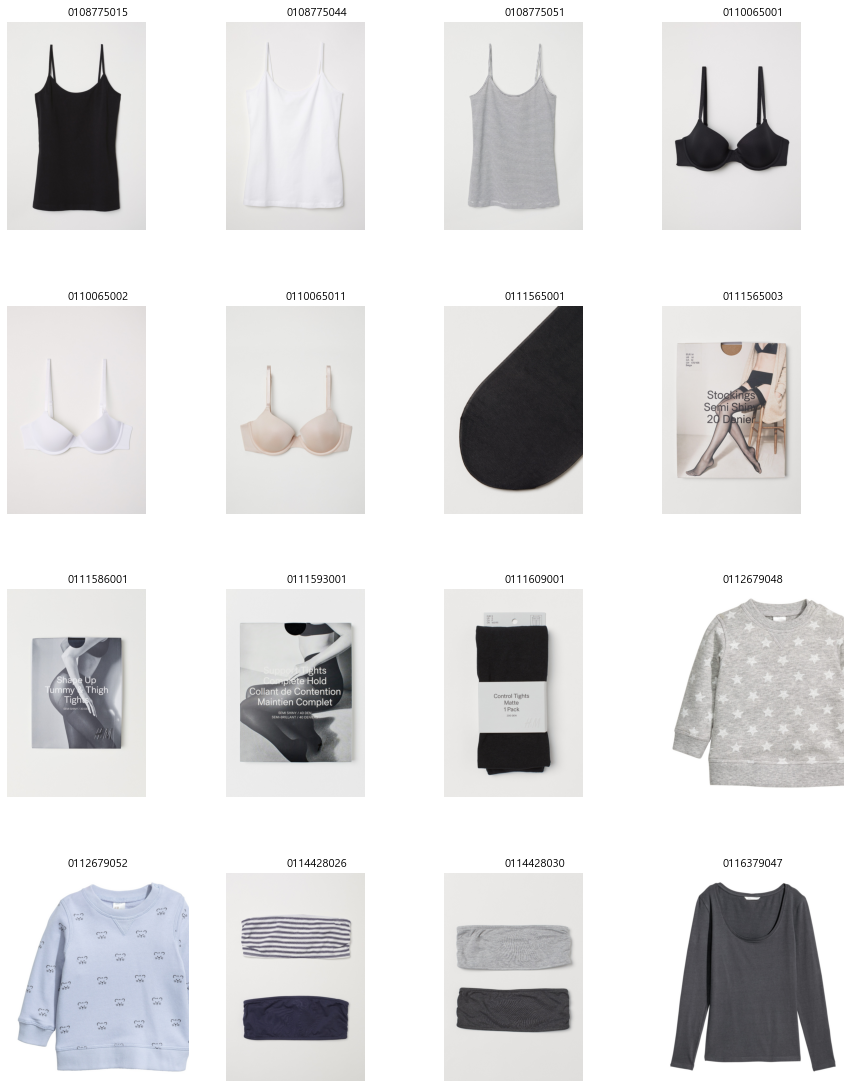

In [56]:
# easy check to use "n" variable
# if you set "n" variable, sequenctial search number of n**2 in "image" directory.

image_loc = data_loc+"images/"
count = 0
plt.rcParams["figure.figsize"] = (15,20)


n = 4
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, squeeze=True)


for dir in os.listdir(image_loc):
    if count==n**2: break
    os.chdir(image_loc+dir)
    for img in os.listdir():
        if count==n**2:
            break
        if img[-3:] != "jpg":
            continue
        raw = cv2.imread(img, cv2.IMREAD_COLOR)
        src = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
        ax[count//n][count%n].imshow(src)
        ax[count//n][count%n].axis("off")
        ax[count//n][count%n].set_title(img[:-4], size=11)
        count+=1

plt.show()

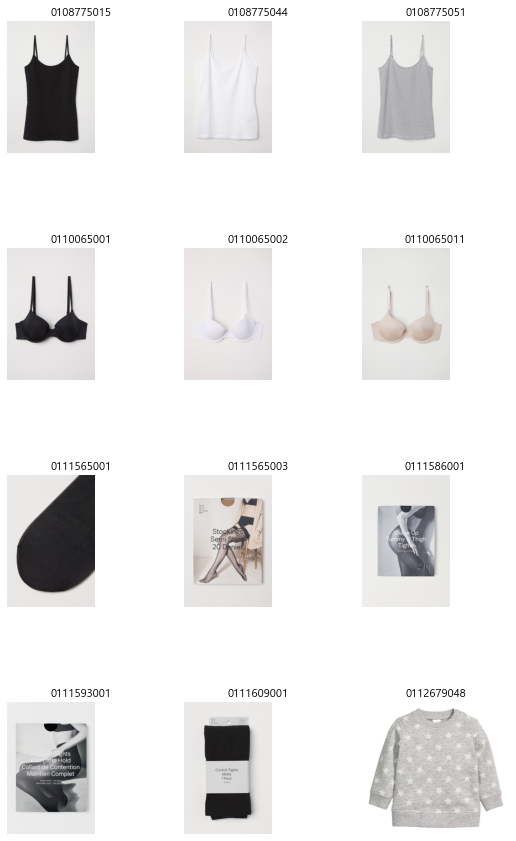

In [77]:
# Cell articles visualization to associate DataFrame

# setting params
n, fig_size, x, y = 12, (9,16), 4, 3

plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots(x, y, sharex=True, sharey=True, squeeze=True)
articles = df_articles["article_id"][:n]

count=0
for i in range(x):
    for j in range(y):
        article_id="0"+str(articles[count])
        os.chdir(image_loc+article_id[:3])
        raw = cv2.imread(article_id+".jpg", cv2.IMREAD_COLOR)
        src = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(src)
        ax[i, j].set_title(article_id, size = 11)
        ax[i, j].axis("off")
        count+=1
        
plt.show()

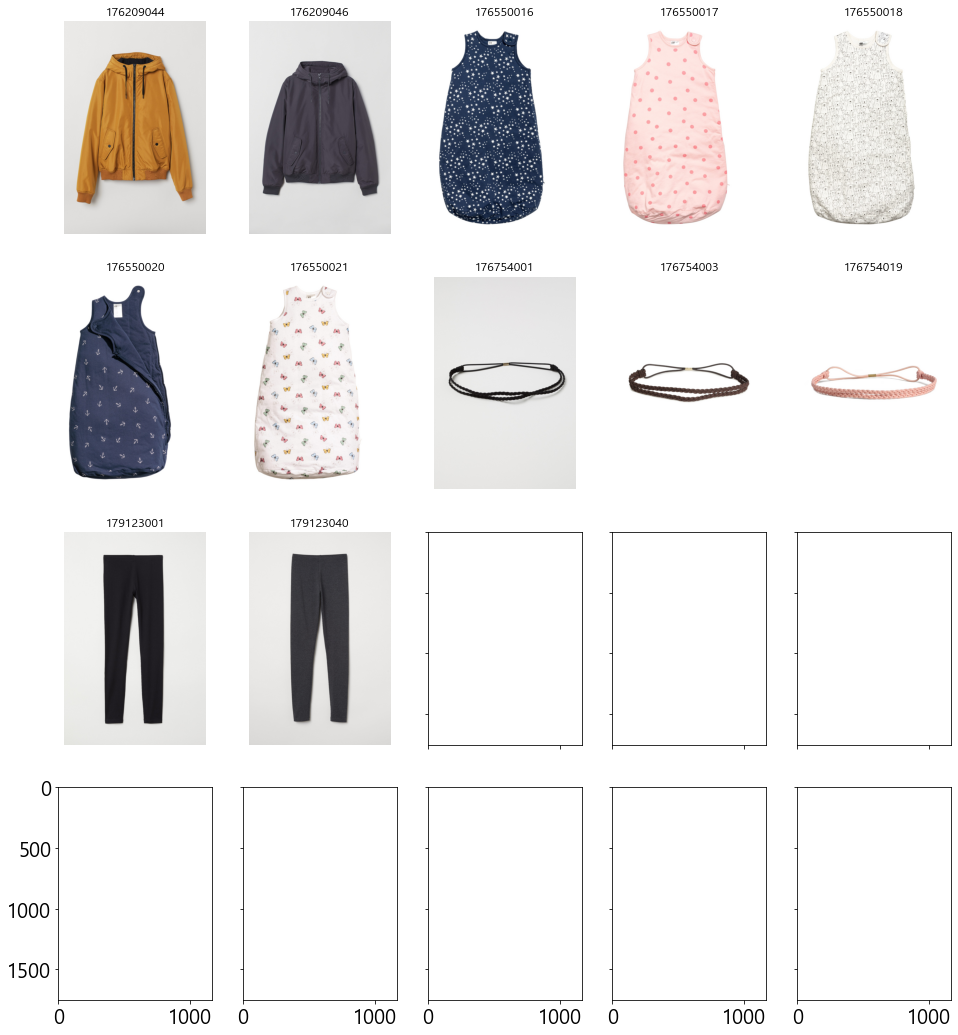

In [91]:
# Define function to load image (using article_id)

def load_image(id):
    image_path = data_loc+"images/@folder/@file_name.jpg"
    str_id = "0"+str(id)
    file = image_path.replace("@folder", str_id[:3]).replace("@file_name", str_id)
    img = np.array(Image.open(file).convert("RGB"))
    return img

targets = df_articles["article_id"].values[105:125]

x, y, figsize = 4, 5, (16,18)
plt.rcParams["figure.figsize"] = figsize
fig, ax = plt.subplots(x, y, sharex=True, sharey=True)

idx = 0
for i in range(x):
    for j in range(y):
        try:
            ax[i,j].imshow(load_image(targets[idx]))
        except:
            continue
        ax[i,j].set_title(str(targets[idx]), size=12)
        ax[i,j].axis("off")
        idx+=1
        
plt.show()

I think that image directory doesn't have whole article_id data.  
It whill check about truth.

**What mean columns in `df_articles`**
---

*Product*

- `article_id`:	The Identification Nubmer aobut articles
- `product_code`: 
- `prod_name`:	
- `product_type_no`: 
- `product_type_name`: 
- `product_group_name`: 

*Graphical*

- `graphical_appearance_no`: 
- `graphical_appearance_name`:

*Colour*

- `colour_group_code`: 
- `colour_group_name`: 

*Perceived_colour*

- `perceived_colour_value_id`: 
- `perceived_colour_value_name`: 
- `perceived_colour_master_id`: 
- `perceived_colour_master_name`: 

*Department*

- `department_no`: 
- `department_name`: 

*Index*

- `index_code`: 
- `index_name`: 
- `index_group_no`:	
- `index_group_name`: 

*Section*

- `section_no`: 
- `section_name`: 

*Garment*

- `garment_group_no`: 
- `garment_group_name`: 

*Detail*

- `detail_desc`: 

## 1.3.Missing Value
---